Dariel Seydulov 62642 bachelor
Kosta Dimitrov 62638 bachelor

Project type A


Project Name: Black Friday Price Predictions

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import svm
from lightgbm import LGBMRegressor

We are using https://www.kaggle.com/datasets/rajeshrampure/black-friday-sale/data Data Set


__About this DS:__

Variable - Definition

User_ID - Unique user identifier

Product_ID - Unique product identifier 

Gender - Sex of User ( F or M )

Age - Age in bins

Occupation - Occupation (Masked)

City_Category - Category of the City (A, B, C)

Stay_In_Current_City_Years - Number of years stay in current city

Marital_Status - Marital Status

Product_Category_1 - Primary product category, wich every product has (Masked)

Product_Category_2 - Optional product category (Masked)

Product_Category_3 - Optional product category, only if product category 2 is taken (Masked)

Purchase - Purchase Amount (Target Variable)

Masked thata is that way to protect customers information and in each site there are different category numeration.


In [49]:
#read the train data
df=pd.read_csv("./data/train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [51]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Male:Female ratio

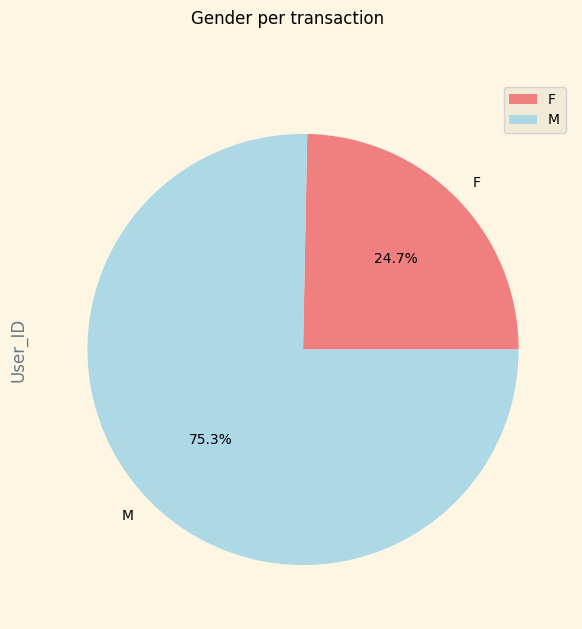

In [52]:
gender_count = df[['Gender', 'User_ID']].groupby('Gender').count()

custom_colors = ['lightcoral', 'lightblue']

plt.style.use('Solarize_Light2')
gender_count.plot(kind='pie', autopct='%1.1f%%', subplots=True, title='Gender per transaction', figsize=(12, 7),
                  colors=custom_colors)

plt.show()

There are 3 times more transaction made by Males than Females.

Text(0.5, 1.0, 'Gender per transaction')

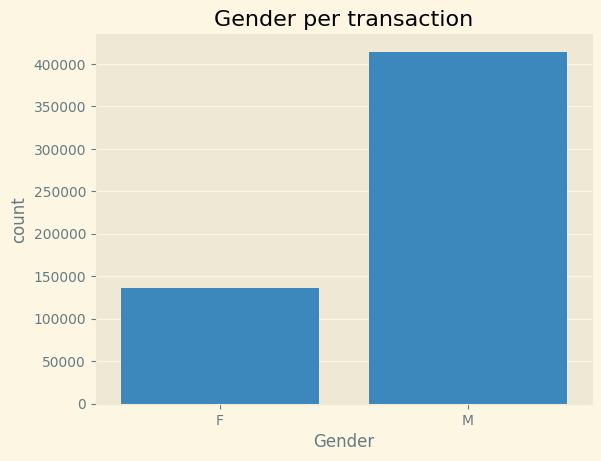

In [53]:
sns.countplot(x=df.Gender)
plt.title('Gender per transaction')

array([<Axes: ylabel='User_ID'>], dtype=object)

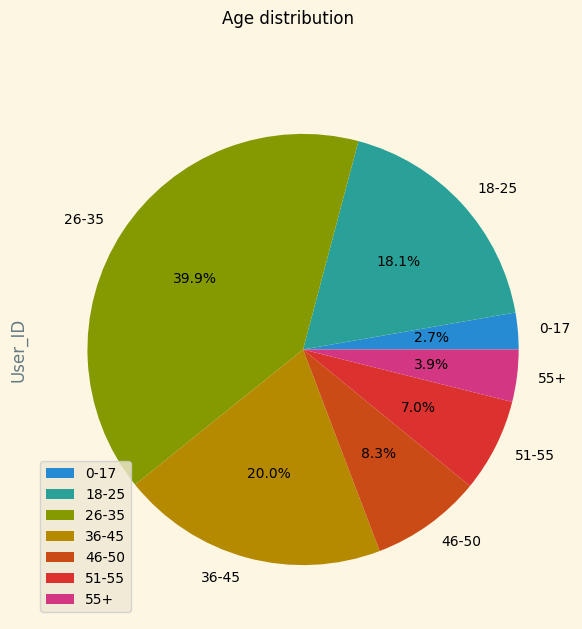

In [54]:
gender_count=df[['Age','User_ID']].groupby('Age').count()
gender_count
plt.style.use('Solarize_Light2')
gender_count.plot(kind='pie',autopct='%1.1f%%',subplots=True,title='Age distribution',figsize=(12,7))

Here we can see that the most transactions are made by 26-35 (40%) and the least transactions are made by 0-17 (3%).

We can see that 80% of the transactions are made by 18-45 years customers.

<Axes: xlabel='Age', ylabel='Purchase'>

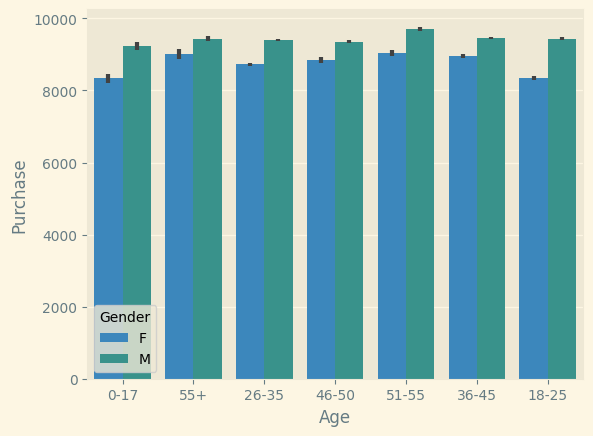

In [55]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

Here we can see that in each age category M is having bigger transactions.

In [56]:
#Drop unnecessary column
df.drop(['User_ID'],axis=1,inplace=True)

In [57]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


__Тук слагаме числова стойност вместо стринг за пола на потребителя, като за жени стойността е 0, а за мъже 1__

In [58]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365


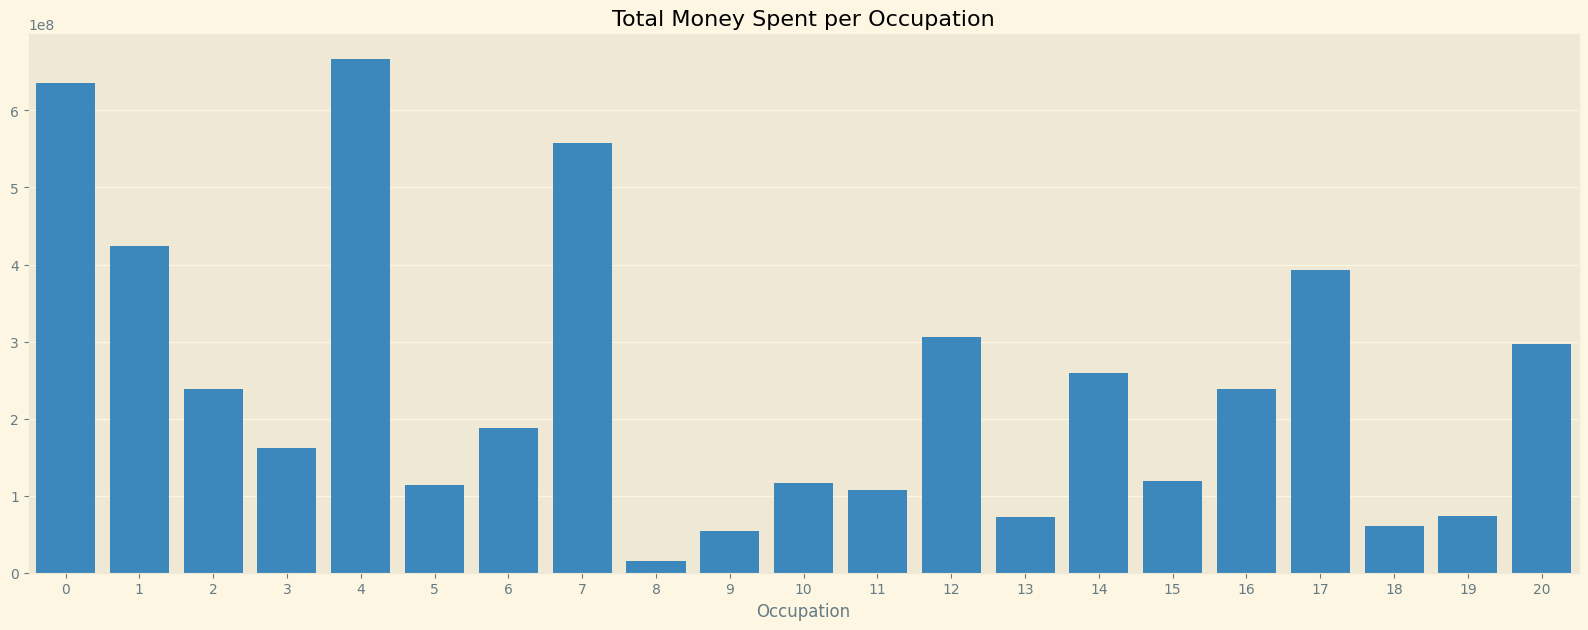

In [59]:
spent_by_occ = df.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 7))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

In [60]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [61]:

label_encoder = preprocessing.LabelEncoder()

df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [62]:

df = pd.concat([df, pd.get_dummies(df['City_Category'], prefix='City')], axis=1)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,True,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,True,False,False
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,True,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,True,False,False
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,False,False,True


In [63]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370,True,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,True,False,False
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422,True,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057,True,False,False
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969,False,False,True


In [64]:
#Check for missing values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
City_A                             0
City_B                             0
City_C                             0
dtype: int64

In columns Product_Category_2 и Product_Category_3 there are null values which we should fill. We have three choises for them mean, mode and median. Other colums do not have null values so we do not have to do anything.

In [65]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [66]:
df['Product_Category_2'].describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [67]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [68]:
category_2_mode=df['Product_Category_2'].mode()[0]
df['Product_Category_2']=df['Product_Category_2'].fillna(category_2_mode)

df['Product_Category_2'].isnull().sum()

0

In [69]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [70]:
df['Product_Category_3'].describe()

count    166821.000000
mean         12.668243
std           4.125338
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [71]:
category_3_mode=df['Product_Category_3'].mode()[0]
df['Product_Category_3']=df['Product_Category_3'].fillna(category_3_mode)

df['Product_Category_3'].isnull().sum()

0

In [72]:
df['Purchase'].isnull().sum()

0

In [73]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
City_A                        0
City_B                        0
City_C                        0
dtype: int64

__Вече данните ни са напълно изчистени и нямаме липсващи стойности в никоя от колоните.__

In [74]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [75]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  City_A                      550068 non-null  bool   
 11  City_B                      550068 non-null  bool   
 12  City_C                      550068 non-null  bool   
dtypes: bool(3), fl

In [77]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  City_A                      550068 non-null  bool   
 11  City_B                      550068 non-null  bool   
 12  City_C                      550068 non-null  bool   
dtypes: bool(3), fl

Purchase by Age Group

<Axes: title={'center': 'Purchase by Age Group'}, ylabel='Age'>

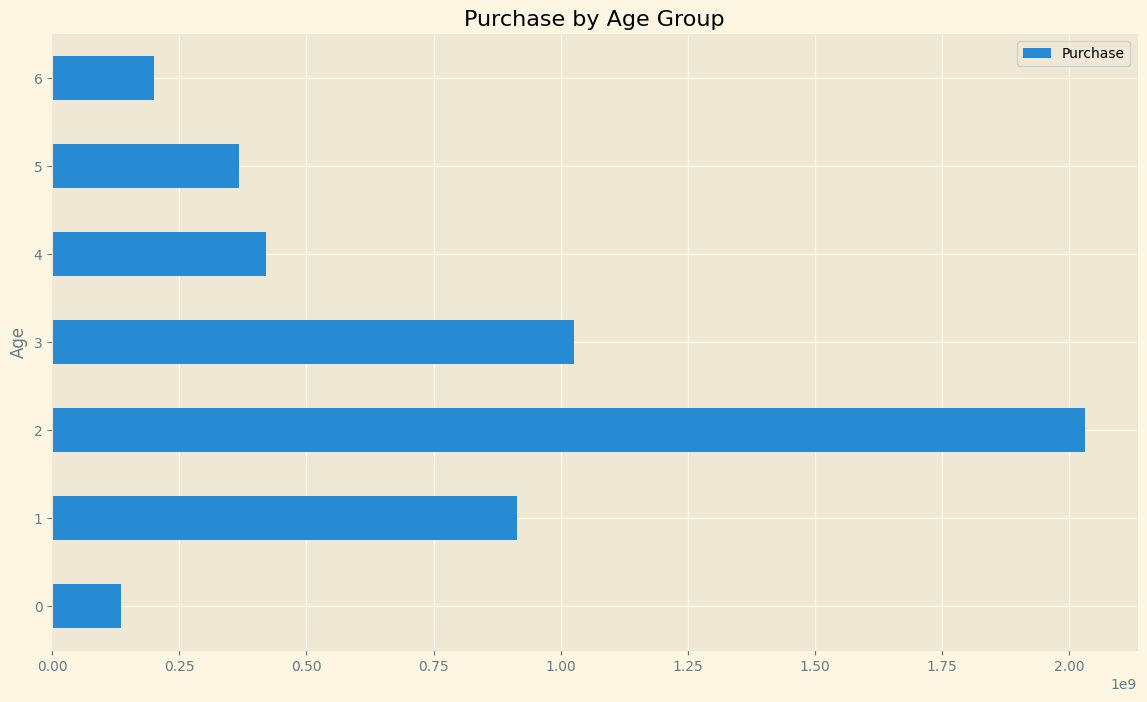

In [78]:
age_pu=df[['Age','Purchase']].groupby('Age').sum()
age_pu.plot(kind='barh',title='Purchase by Age Group', figsize=(14, 8))

Product category by Purchase


<Axes: title={'center': 'Product Category 1 by purchases'}, ylabel='Product_Category_1'>

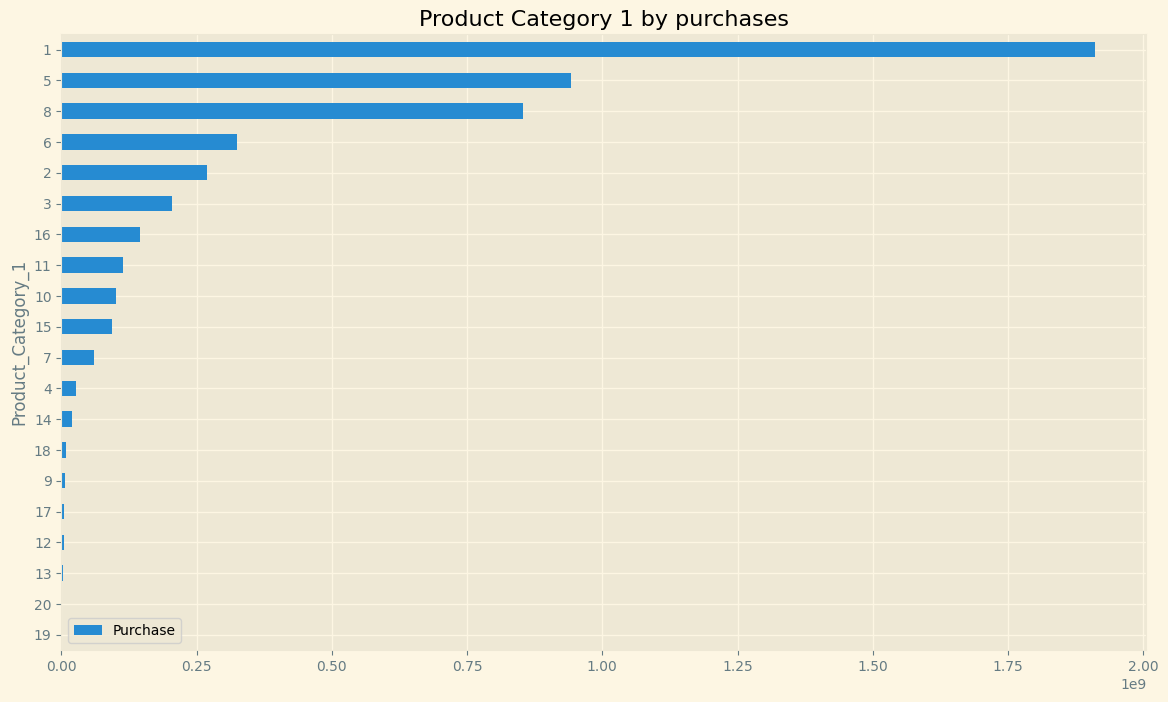

In [79]:
prod_plot1=df[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum()
prod_plot1=prod_plot1.sort_values(by='Purchase')
prod_plot1.plot(kind='barh',title='Product Category 1 by purchases', figsize=(14, 8))

<Axes: title={'center': 'Product Category 2 by purchases'}, ylabel='Product_Category_2'>

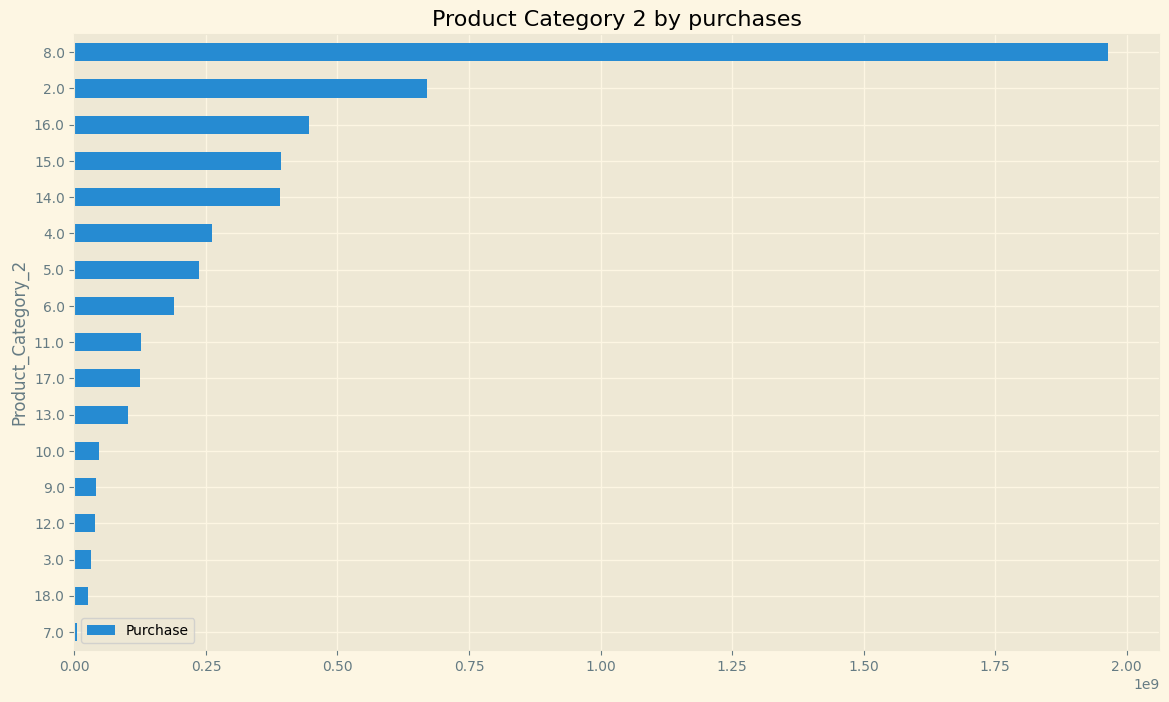

In [80]:
prod_plot2=df[['Product_Category_2','Purchase']].groupby('Product_Category_2').sum()
prod_plot2=prod_plot2.sort_values(by='Purchase')
prod_plot2.plot(kind='barh',title='Product Category 2 by purchases', figsize=(14, 8))

<Axes: title={'center': 'Product Category 3 by purchases'}, ylabel='Product_Category_3'>

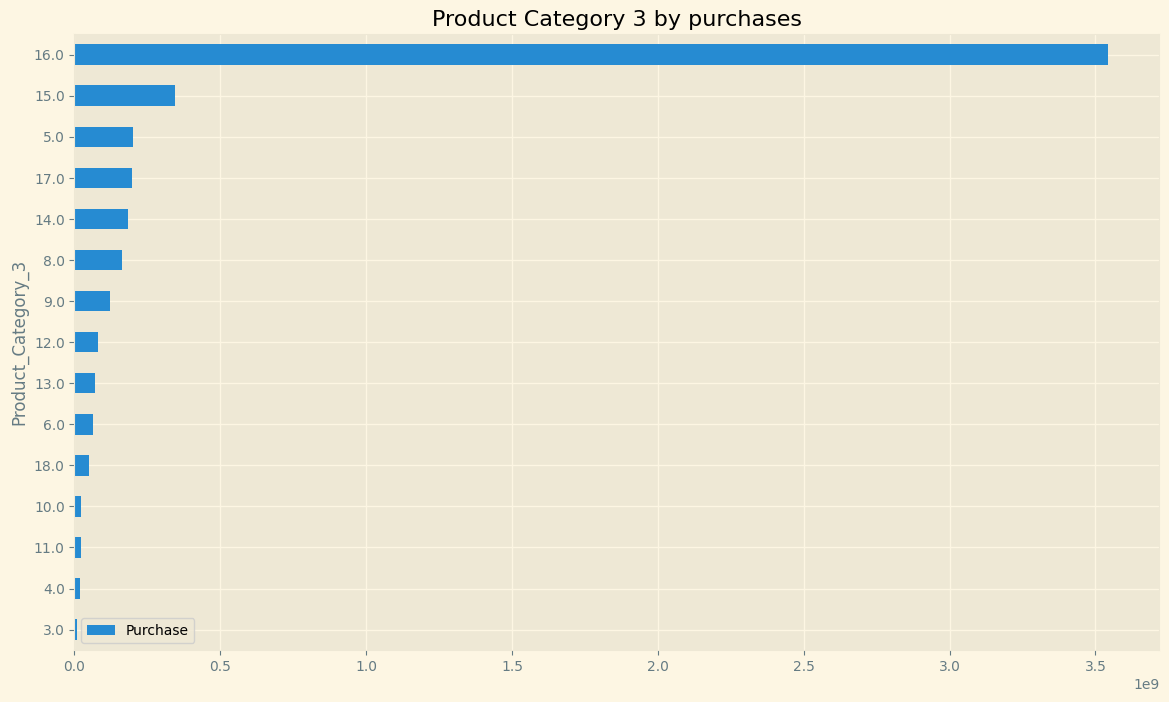

In [81]:
prod_plot3=df[['Product_Category_3','Purchase']].groupby('Product_Category_3').sum()
prod_plot3=prod_plot3.sort_values(by='Purchase')
prod_plot3.plot(kind='barh',title='Product Category 3 by purchases', figsize=(14, 8))

In [82]:
df.drop('Product_ID',axis=1,inplace=True)
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,0,0,10,2,0,3,8.0,16.0,8370,True,False,False
1,0,0,10,2,0,1,6.0,14.0,15200,True,False,False
2,0,0,10,2,0,12,8.0,16.0,1422,True,False,False
3,0,0,10,2,0,12,14.0,16.0,1057,True,False,False
4,1,6,16,4,0,8,8.0,16.0,7969,False,False,True


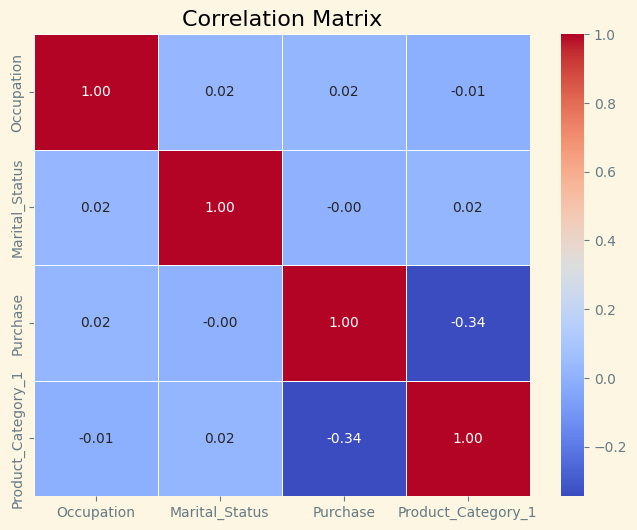

In [116]:
correlation_matrix = df[['Occupation', 'Marital_Status', 'Purchase', 'Product_Category_1']].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

Here we can see that there is correlation between Purchase and Product_Category_1

<Axes: ylabel='Frequency'>

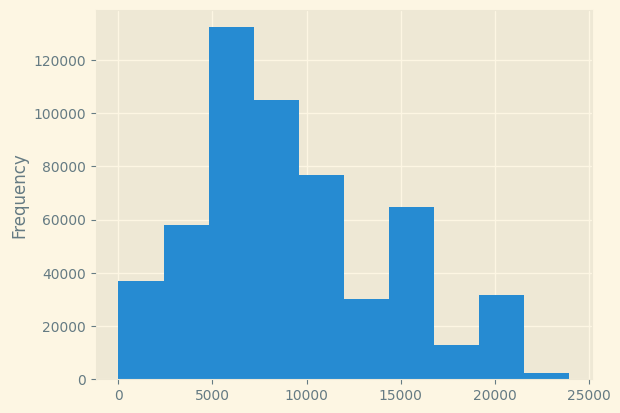

In [83]:
df['Purchase'].plot.hist()

We can see really strange distribution which is not like normal distribution. So we try to use only values with purchase less than 14 000.

In [84]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [85]:
X=df.drop(['Purchase'],axis=1)
Y=df['Purchase']

In [86]:
X.shape

(550068, 11)

In [87]:
Y.shape

(550068,)

Our target column will be purchase. We will use linear regression and will test with different types of regularisations, SVM and Neural Network. We will visualise the results.

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.3, random_state=42)  

Linear Regression

Lets try predicting prices with Linear Regression.

In [89]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
linear_reg_preds = linear_reg.predict(X_test)

print("Linear Regression:")
print("MAE: ",mean_absolute_error(Y_test, linear_reg_preds))
print("R-squared:", r2_score(Y_test, linear_reg_preds))

Linear Regression:
MAE:  3577.3825975178916
R-squared: 0.12927302751399405


It is interesting to see if regularization will give us better results.

Lasso

In [90]:
alpha_values = [0.01, 0.1, 1.0, 10.0]

for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, Y_train)
    lasso_reg_preds = lasso_reg.predict(X_test)

    print(f"\nLasso Regression with alpha={alpha}:")
    print("Mean Squared Error:", mean_squared_error(Y_test, lasso_reg_preds))
    print("MAE: ", mean_absolute_error(Y_test, lasso_reg_preds))
    print("R-squared:", r2_score(Y_test, lasso_reg_preds))



Lasso Regression with alpha=0.01:
Mean Squared Error: 21944299.143706333
MAE:  3577.432093104967
R-squared: 0.12927309243718832

Lasso Regression with alpha=0.1:
Mean Squared Error: 21944302.45082471
MAE:  3577.425927005044
R-squared: 0.12927296121417953

Lasso Regression with alpha=1.0:
Mean Squared Error: 21944366.776373096
MAE:  3577.351459518813
R-squared: 0.12927040884349517

Lasso Regression with alpha=10.0:
Mean Squared Error: 21946653.91830746
MAE:  3576.842958026682
R-squared: 0.1291796574364612


Ridge

In [91]:
alpha_values = [0.01, 0.1, 1.0, 10.0]

for alpha_val in alpha_values:
    ridge_reg = Ridge(alpha=alpha_val)
    ridge_reg.fit(X_train, Y_train)
    ridge_reg_preds = ridge_reg.predict(X_test)

    print(f"\nRidge Regression with alpha={alpha_val}:")
    print("Mean Squared Error:", mean_squared_error(Y_test, ridge_reg_preds))
    print("MAE: ", mean_absolute_error(Y_test, ridge_reg_preds))
    print("R-squared:", r2_score(Y_test, ridge_reg_preds))


Ridge Regression with alpha=0.01:
Mean Squared Error: 21944298.790551577
MAE:  3577.4327854889184
R-squared: 0.12927310645000067

Ridge Regression with alpha=0.1:
Mean Squared Error: 21944298.79652463
MAE:  3577.4327787190923
R-squared: 0.12927310621299615

Ridge Regression with alpha=1.0:
Mean Squared Error: 21944298.85626784
MAE:  3577.432711022083
R-squared: 0.12927310384244795

Ridge Regression with alpha=10.0:
Mean Squared Error: 21944299.45495704
MAE:  3577.432034177295
R-squared: 0.12927308008708482


__As we can see regularization makes no difference so possible reasons are:__
1. Dataset doesn't have high correlation among predictor variables.
2. Not enough features or small dataset
3. Using a simple model that is not prone to overfitting

We see that the linear regression is giving us really bad results, so let try with decision tree.

Decision Tree

In [92]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
decision_tree_preds = decision_tree.predict(X_test)

print("\nDecision Tree:")
print("Mean Squared Error:", mean_squared_error(Y_test, decision_tree_preds))
print("R-squared:", r2_score(Y_test, decision_tree_preds))


Decision Tree:
Mean Squared Error: 11099752.015821649
R-squared: 0.5595734142996147


We can see that now result is a lot better that linear regression, so lets try to make it better.

XGBoost

In [93]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(
    n_estimators = 100
)
xgboost.fit(X_train, Y_train)
xgboost_preds = xgboost.predict(X_test)
predicts_test = xgboost.predict(X_train)
    
print("\nXGBoost:")
print("Mean Squared Error:", mean_squared_error(Y_test, xgboost_preds))
print("R-squared:", r2_score(Y_test, xgboost_preds))
print("Mean Squared Error:", mean_squared_error(Y_train, predicts_test))
print("R-squared:", r2_score(Y_train, predicts_test))


XGBoost:
Mean Squared Error: 8376567.2165203495
R-squared: 0.6676265475297879
Mean Squared Error: 8072844.104321719
R-squared: 0.6802009743502433


In [94]:
print("MAE: ", mean_absolute_error(Y_train, predicts_test))

MAE:  2128.273271253234


Here the results are better but, they are stil not great. Now we will change a little bit df, because for XGBoost it is better to label encode the columns.

In [95]:
from sklearn.preprocessing import LabelEncoder

#read the train data
df=pd.read_csv("./data/train.csv")

columns_to_encode = ['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    # Fit and transform the column
    df[column] = label_encoder.fit_transform(df[column])

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,2734,1,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5883,3567,1,5,13,1,1,1,20,NaN,NaN,368
550064,5885,3568,0,2,1,2,3,0,20,NaN,NaN,371
550065,5886,3568,0,2,15,1,4,1,20,NaN,NaN,137
550066,5888,3568,0,6,1,2,2,0,20,NaN,NaN,365


In [96]:
df_copy = df.copy()

s1 = set(df_copy[df_copy['Product_Category_1'] == 1]['Product_ID'].unique())
s2 = set(df_copy[df_copy['Product_Category_1'] != 1]['Product_ID'].unique())

len(s1), len(s2), len(df_copy['Product_ID'].unique())

(493, 3138, 3631)

In [97]:
df_copy

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,2734,1,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5883,3567,1,5,13,1,1,1,20,NaN,NaN,368
550064,5885,3568,0,2,1,2,3,0,20,NaN,NaN,371
550065,5886,3568,0,2,15,1,4,1,20,NaN,NaN,137
550066,5888,3568,0,6,1,2,2,0,20,NaN,NaN,365


In [112]:
df_copy = df.copy()

print(len(df_copy), len(df))

X=df_copy.drop(['Purchase'],axis=1)
Y=df_copy['Purchase']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.3, random_state=42) 

from xgboost import XGBRegressor

xgboost = XGBRegressor(
    n_estimators = 500,
    max_depth = 8,
)
xgboost.fit(X_train, Y_train)
xgboost_preds_train = xgboost.predict(X_train)
xgboost_preds_test = xgboost.predict(X_test)
    
print("\nXGBoost:")
print("MAE train: ",mean_absolute_error(Y_train, xgboost_preds_train))
print("MAE test: ",mean_absolute_error(Y_test, xgboost_preds_test))
print("R-squared train:", r2_score(Y_train, xgboost_preds_train))
print("R-squared test:", r2_score(Y_test, xgboost_preds_test))

550068 550068

XGBoost:
MAE train:  1469.354772988281
MAE test:  1916.3551115731684
R-squared train: 0.847022441349445
R-squared test: 0.7319281928199126


When we try different n_estimators and max_depth we can make the model even better but now is it overfits. 

Now we need to see why it is so hard to predict the prices. Let see wich column is most important for the XGBoost. 

In [99]:
# Get feature importance scores
importance_scores = xgboost.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)


                       Feature  Importance
8           Product_Category_1    0.786220
1                   Product_ID    0.034094
10          Product_Category_3    0.030109
9           Product_Category_2    0.026547
5                City_Category    0.022616
2                       Gender    0.017337
4                   Occupation    0.017223
3                          Age    0.017167
6   Stay_In_Current_City_Years    0.017050
0                      User_ID    0.016087
7               Marital_Status    0.015551


We can see that the Product_Category_1 is the most important feature with 81% importance. In that column there is written the main product category.

Let try different LGBMRegressor to see if it will work better.

In [100]:
df_copy = df.copy()

print(len(df_copy), len(df))

X=df_copy.drop(['Purchase'],axis=1)
Y=df_copy['Purchase']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.3, random_state=42) 

lgbmregressor = LGBMRegressor(
    n_estimators = 500,
    max_depth = 8,
)
lgbmregressor.fit(X_train, Y_train)
lgbmregressor_preds_train = lgbmregressor.predict(X_train)
lgbmregressor_preds_test = lgbmregressor.predict(X_test)

print("\nLGBMRegressor:")
print("MAE train: ",mean_absolute_error(Y_train, lgbmregressor_preds_train))
print("MAE test: ",mean_absolute_error(Y_test, lgbmregressor_preds_test))
print("R-squared train:", r2_score(Y_train, lgbmregressor_preds_train))
print("R-squared test:", r2_score(Y_test, lgbmregressor_preds_test))

550068 550068
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.255642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 385047, number of used features: 11
[LightGBM] [Info] Start training from score 9261.584983
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

LGBMRegressor:
MAE train:  1933.867153405805
MAE test:  1973.5064291762533
R-squared train: 0.7371882571846118
R-squared

The result with LGBMRegressor is close to the XGBoost but it fixes the overfiting.

Now we can tray ensable to push the result.

In [101]:
def ensemble(models, X_train, X_test, Y_train, Y_test):
    preds_test = []
    preds_train = []
    for model in models:
        model.fit(X_train, Y_train)
        preds_train.append(model.predict(X_train))
        preds_test.append(model.predict(X_test))
        
    preds_train_final = np.mean(preds_train, axis=0)
    preds_test_final = np.mean(preds_test, axis=0)
    print("MAE train: ",mean_absolute_error(Y_train, preds_train_final))
    print("MAE test: ",mean_absolute_error(Y_test, preds_test_final))
    print("R-squared train:", r2_score(Y_train, preds_train_final))
    print("R-squared test:", r2_score(Y_test, preds_test_final))
    return preds_test_final

X=df_copy.drop(['Purchase'],axis=1)
Y=df_copy['Purchase']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.3, random_state=42) 

ensemble(
    [
        XGBRegressor(
            n_estimators = 500,
            max_depth = 8,
        ), 
        LGBMRegressor(
            n_estimators = 500,
            max_depth = 8,
        )
    ], X_train, X_test, Y_train, Y_test
)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 385047, number of used features: 11
[LightGBM] [Info] Start training from score 9261.584983
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
MAE train:  1665.0709818311104
MAE test:  1904.5564944126743
R-squared train: 0.8059523732935692
R-squared test: 0.7390282201528368


array([13379.9078897 , 16333.82150227,  8343.50842118, ...,
       16018.07847601, 12639.11137748,  6640.33623524])

It gives a little bit better results that only LGBMRegressor and a little bit lower overfiting that XGBRegressor, but results are still not improving (At this moment we have the best results comapred to all Kaggle notebooks)


Now lets see why this data is so hard to be predicted. Lets compare the prices with predicted prices and see if there is connection when the mistake is big.


In [102]:
pd.concat([X_test, Y_test], axis=1).reset_index(drop=True)
df_pred = pd.concat([pd.concat([X_test, Y_test], axis=1).reset_index(drop=True), pd.Series(xgboost_preds_test)], axis=1)
df_pred = df_pred.rename({0:'Prediction'}, axis = 1)

df_mistake = df_pred[np.abs(df_pred['Purchase']-df_pred['Prediction']) > 7500]
df_mistake

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prediction
4,1953,21,1,1,4,1,0,0,6,8.0,16.0,4492,12302.739258
39,4954,2508,0,1,4,1,3,0,15,16.0,NaN,17409,9758.537109
97,4532,2053,1,3,20,1,1,1,1,16.0,NaN,4532,12848.192383
168,1322,3201,0,4,2,0,0,0,1,11.0,15.0,15223,7537.266602
265,17,3244,0,1,3,1,3,0,1,16.0,NaN,4271,12170.981445
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164443,531,1067,0,2,0,1,0,0,16,NaN,NaN,4796,17272.904297
164713,3411,458,0,2,15,0,0,1,1,2.0,15.0,4005,15066.600586
164730,3921,1937,0,3,9,2,1,1,15,16.0,NaN,4583,14463.566406
164761,5353,719,1,1,4,0,4,1,1,15.0,17.0,18952,9339.559570


In [113]:
for col in df.columns:
    if col == 'Purchase':
        continue
    print(f"---------------------{col}---------------------")
    print(df[col].value_counts() / len(df))
    print(df_mistake[col].value_counts() / len(df_mistake))

---------------------User_ID---------------------
User_ID
1634    0.001865
4166    0.001780
1885    0.001633
1142    0.001567
863     0.001496
          ...   
2615    0.000013
2052    0.000013
5662    0.000013
4866    0.000013
686     0.000011
Name: count, Length: 5891, dtype: float64
User_ID
3491    0.004021
534     0.003217
4855    0.003217
3382    0.002815
3512    0.002815
          ...   
1527    0.000402
7       0.000402
2233    0.000402
573     0.000402
1445    0.000402
Name: count, Length: 1556, dtype: float64
---------------------Product_ID---------------------
Product_ID
2536    0.003418
249     0.002936
1016    0.002931
1030    0.002840
565     0.002672
          ...   
3016    0.000002
2865    0.000002
2206    0.000002
1938    0.000002
646     0.000002
Name: count, Length: 3631, dtype: float64
Product_ID
2314    0.010454
283     0.009650
719     0.008846
1034    0.008444
1026    0.008042
          ...   
1060    0.000402
1390    0.000402
2348    0.000402
2429    0.000402
28

We can see that the resuls are normal exept the Product_Category_1.
For Product_Category_1 we can see that category 1 is in 25% of rows and have 67% error with 7500 or more and we know that this colum is 81% important.

Let see this column distribution.

<Axes: ylabel='Frequency'>

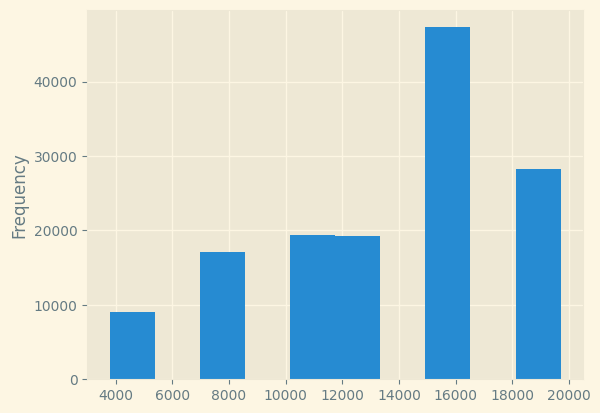

In [104]:
df[df['Product_Category_1'] == 1]['Purchase'].plot.hist()

We can see that the it will be hard to predict price based on this column.

In [105]:
np.hstack((predicts_test, Y_train))

array([ 7707.62841797, 14258.75976562,  7441.43994141, ...,
        6954.        ,  6151.        ,  7146.        ])

Lests see what is the Pruchase distribution.

<Axes: ylabel='Frequency'>

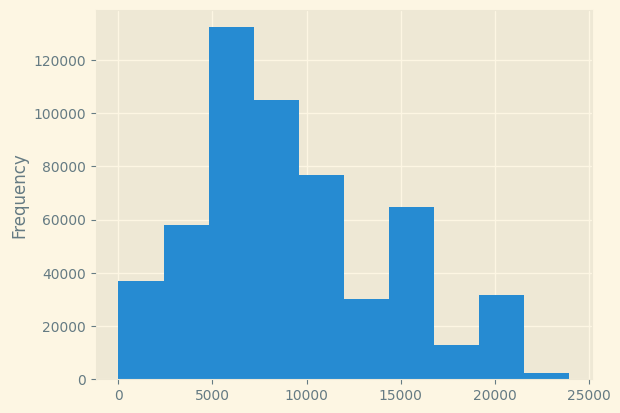

In [106]:
df['Purchase'].plot.hist()

We can see that the districbuion is strange after 14000. 

__Test__

Lets take rows with lower than 14000 purchase.

In [107]:
df_14000 = df[df['Purchase'] < 14000]

<Axes: ylabel='Frequency'>

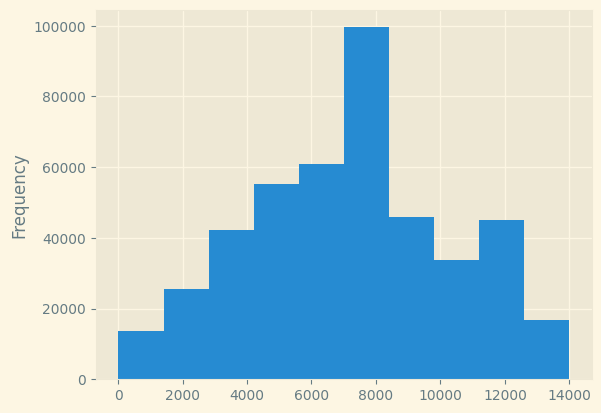

In [108]:
df_14000['Purchase'].plot.hist()

This distrubition looks better. Lets try XGBRegressor on it.

In [109]:
X=df_14000.drop(['Purchase'],axis=1)
Y=df_14000['Purchase']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.3, random_state=42)  

xgboost = XGBRegressor(
    n_estimators = 500,
    max_depth = 8,
)
xgboost.fit(X_train, Y_train)
xgboost_preds = xgboost.predict(X_test)
predicts_test = xgboost.predict(X_train)
    
print("\nXGBoost:")
print("Mean Squared Error:", mean_squared_error(Y_test, xgboost_preds))
print("R-squared:", r2_score(Y_test, xgboost_preds))
print("Mean Squared Error:", mean_squared_error(Y_train, predicts_test))
print("R-squared:", r2_score(Y_train, predicts_test))


XGBoost:
Mean Squared Error: 3857957.4788283133
R-squared: 0.5948365455769618
Mean Squared Error: 2114370.585630329
R-squared: 0.7784836688020464


We can see that here we have very big overfitting.

In [110]:
print("MAE: ",mean_absolute_error(Y_train, predicts_test))

MAE:  1119.7311878971104


__Conclusion__

1 There is strange Purchase distribution.

2 At 80% target variable depends on Product_Category_1, wich is in 65% of the casses wrong with more than 7500.

3 We trained the model to have R2 score near 75%, wich is with 10% better than the best Kaggle codes.

4 We have columns with wide range of values and we do not have any additional information for them.

Because of that this Data Set is really hard to be predicted with better R2 score without more information.